In [1]:
import sys, time, wmi, psutil
SYSTEM_INFO = wmi.WMI().Win32_OperatingSystem()[0]
"system: {0}, {1}, {2}".format(SYSTEM_INFO.Caption, SYSTEM_INFO.BuildNumber, SYSTEM_INFO.OSArchitecture) 
"memory: {}G".format(round(psutil.virtual_memory().total / 1024**3, 2))
"cpu: {}".format(psutil.cpu_count())
"python: {}".format(sys.version)
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time()))

'system: Microsoft Windows 10 教育版, 18362, 64 位'

'memory: 15.86G'

'cpu: 4'

'python: 3.7.1 (default, Oct 28 2018, 08:39:03) [MSC v.1912 64 bit (AMD64)]'

'2020-01-06 10:33:37'

- **@author**: run_walker
- **@references**: 
    1. [python科学计算学习二：matplotlib绘图，图标注释（2）](http://blog.csdn.net/ikerpeng/article/details/20381009)
    2. [matplotlib图例中文乱码?](https://www.zhihu.com/question/25404709/answer/67672003)
    3. [【mac】matplotlib显示中文问题（两种方法）](https://blog.csdn.net/alicelmx/article/details/81231803)
    4. [python matplotlib 中文显示参数设置](https://segmentfault.com/a/1190000005144275)

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.__name__, matplotlib.__version__

('matplotlib', '3.1.2')

# 图标注释

In [3]:
import numpy as np
x = np.linspace(-1, 1, 100)
y = x**2
x1 = np.linspace(-1, 1, 10)
y1 = x1**2

## text()
`text()`的坐标是图中坐标轴的坐标

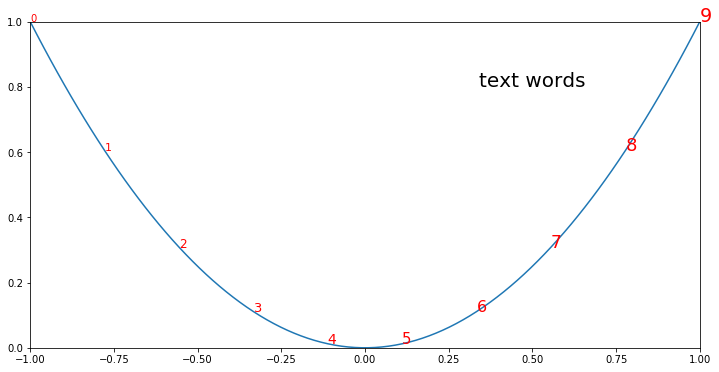

In [4]:
plt.figure(figsize=(12, 6))  # 指定图像长宽（也就确定了比例）
plt.axis([-1, 1, 0, 1])      # 设定坐标轴范围
plt.plot(x, y)
for i, (_x, _y) in enumerate(zip(x1, y1)):
    plt.text(_x, _y, i, color='red', fontsize=i+10)
plt.text(0.5, 0.8, 'text words', color='black', ha='center', fontsize=20)
plt.show();

## figtext()
`figtext()`的坐标是图的位置比例

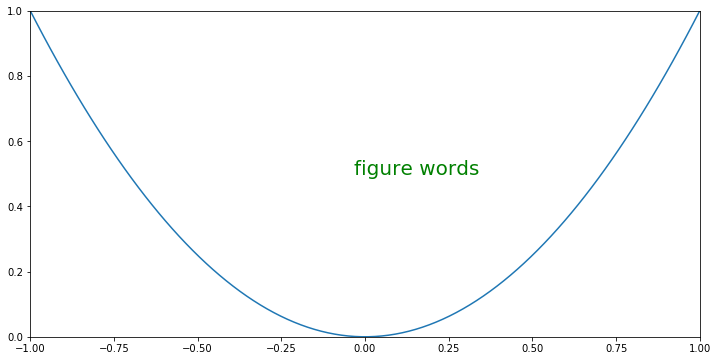

In [5]:
plt.figure(figsize=(12, 6))
plt.axis([-1, 1, 0, 1])
plt.plot(x, y)
# 设定坐标为（0.5,0.5）时，文字起始位置为整张图的中心
plt.figtext(0.5, 0.5, 'figure words', color='green', fontsize=20) 
plt.show();

## annotate()

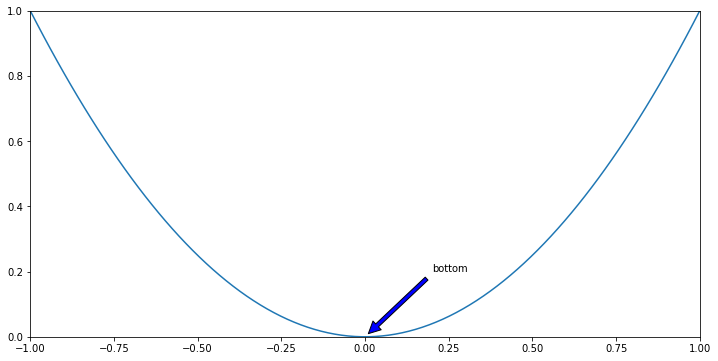

In [6]:
plt.figure(figsize=(12, 6))
plt.axis([-1, 1, 0, 1])
plt.plot(x, y)
plt.annotate("bottom", xy=(0, 0), xytext=(0.2, 0.2), arrowprops=dict(facecolor='blue', shrink=0.05))
plt.show();

# 中文方框

In [7]:
# 查看全部可用字体
import pandas as pd; pd.set_option('display.max_rows', None)
import matplotlib.font_manager

df = pd.DataFrame([[f.name, f.fname] for f in matplotlib.font_manager.fontManager.ttflist], columns=['name', 'file'])
df['lower_name'] = df['name'].str.lower()
df = df.sort_values(['lower_name']).reset_index(drop=True)
df

,name,file,lower_name
0,Agency FB,C:\WINDOWS\Fonts\AGENCYB.TTF,agency fb
1,Agency FB,C:\Windows\Fonts\AGENCYR.TTF,agency fb
2,Algerian,C:\Windows\Fonts\ALGER.TTF,algerian
3,Arial,C:\Windows\Fonts\arialbi.ttf,arial
4,Arial,C:\Windows\Fonts\ARIALNBI.TTF,arial
5,Arial,C:\Windows\Fonts\ariblk.ttf,arial
6,Arial,C:\WINDOWS\Fonts\ARIALNI.TTF,arial
7,Arial,C:\Windows\Fonts\arialbd.ttf,arial
8,Arial,C:\WINDOWS\Fonts\ARIALNB.TTF,arial
9,Arial,C:\Windows\Fonts\arial.ttf,arial


In [8]:
# 查看matplotlib位置
import matplotlib
matplotlib.matplotlib_fname()

'C:\\Users\\admin\\AppData\\Roaming\\Python\\Python37\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

这三步并不是必须进行的。matplotlib可以直接使用系统带有的字体，而不一定是`/matplotlib/mpl-data/fonts/tff`路径下的。
1. 找一个中文字体文件。
    - Windows：`C:\Windows\Fonts`，在**设计用于**下筛选简体中文。
    - Mac：`启动台 > 字体册 > 中文 > 导出字体`。
2. 将字体文件复制到目标python版本的`site-packages/matplotlib/mpl-data/fonts/tff`路径下。注意：windows下该路径直接位于`Lib`文件夹下，而mac下位于`Lib/python3.6`下（以python3.6为例）。
```python
import matplotlib
matplotlib.matplotlib_fname()
```
3. 重新加载matplotlib的字体库
```python
from matplotlib.font_manager import _rebuild
_rebuild()
```

In [10]:
# Graphics in SVG format are more sharp and legible 中文会显得特别模糊，开启SVG模式增加清晰度
%config InlineBackend.figure_format = 'svg' 

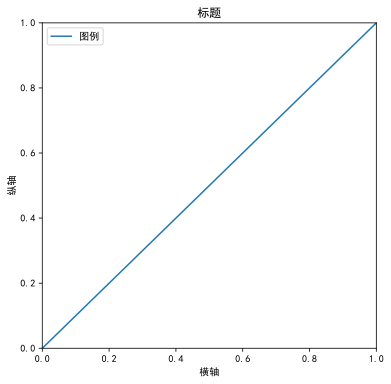

In [11]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # FZYaoTi

plt.figure(figsize=(6, 6))
plt.axis([0, 1, 0, 1])
plt.plot([0, 1], [0, 1], label='图例')
plt.xlabel("横轴")
plt.ylabel("纵轴")
plt.title("标题")
plt.legend(loc="upper left")
plt.show();

# 负号方框

## 不修改全局配置
```python
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False
```

## 修改全局配置
在配置文件`matplotlibrc`内解开行`axes.unicode_minus  : False`的注释。

# [jupyter notebook使用matplotlib绘制动画显示空白](http://www.wangluoshenghuo.com/2019/01/28/jupyter-notebook%E4%BD%BF%E7%94%A8matplotlib%E7%BB%98%E5%88%B6%E5%8A%A8%E7%94%BB%E7%A9%BA%E7%99%BD%E7%9A%84%E8%A7%A3%E5%86%B3%E6%96%B9%E6%B3%95/)

# 坐标轴
[matplotlib tricks（关闭坐标刻度、坐标轴不可见）](https://blog.csdn.net/lanchunhui/article/details/52931883)